In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy 
import matplotlib.pyplot as plt

In [9]:
games =pd.read_csv('games.csv', sep = ',')  # товарные позиции, входящие в заказы

### Задание 1
Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [10]:
games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Задание 4
Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [4]:
games.dropna(subset=['Year'], inplace=True)

In [44]:
count_games = games.groupby(['Year']).agg({'Name':'nunique'})
count_games.describe()

,Name
count,39.000000
mean,311.025641
std,320.296531
min,1.000000
25%,19.000000
50%,258.000000
75%,497.500000
max,1039.000000


In [118]:
games.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [45]:
count_games.Name.value_counts().head(3)

17    2
14    2
16    2
Name: Name, dtype: int64

In [49]:
scipy.stats.mode(games.Year)

ModeResult(mode=array([2009.]), count=array([1431]))

### Задание 5
На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [107]:
g5=games['Platform'].value_counts(normalize=True).to_frame()*100
g5_1=g5.query('Platform > 7 ')

In [106]:
g5_1.index

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'], dtype='object')

In [100]:
list(g5_1['Platform'])

[13.06424940282967,
 13.027500459361793,
 7.986770380351565,
 7.9010228455931895,
 7.564157530470999,
 7.331414221841122,
 7.282415630550622]

### Задание 6
Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [115]:
scipy.stats.mode(games.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

### Задание 7
Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.

In [129]:
games.query("Publisher == 'Nintendo'").describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


### Задание 8
Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

Hint: sns.boxplot(). Для удобства можете изменить размер графика, например: plt.figure(figsize=(16,16))

In [206]:
g8=games.query("Publisher == 'Nintendo'")
g8

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [211]:
g8_descr=games.query("Publisher == 'Nintendo'").groupby('Genre').JP_Sales.describe()
g8_descr

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,78.0,0.373846,0.554997,0.0,0.0800,0.170,0.4600,3.96
Adventure,35.0,0.257429,0.514909,0.0,0.0300,0.090,0.2300,2.69
Fighting,18.0,0.830000,0.843529,0.0,0.1325,0.500,1.3650,2.66
Misc,100.0,0.552500,0.786361,0.0,0.0500,0.250,0.7300,4.16
Platform,111.0,0.922162,1.181532,0.0,0.2250,0.540,1.0800,6.81
Puzzle,74.0,0.501216,0.835924,0.0,0.0800,0.255,0.6025,5.32
Racing,37.0,0.789730,1.132714,0.0,0.1000,0.340,0.8900,4.13
Role-Playing,105.0,0.970952,1.661960,0.0,0.1600,0.360,0.7400,10.22
Shooter,24.0,0.251250,0.316685,0.0,0.0775,0.130,0.2825,1.44


<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

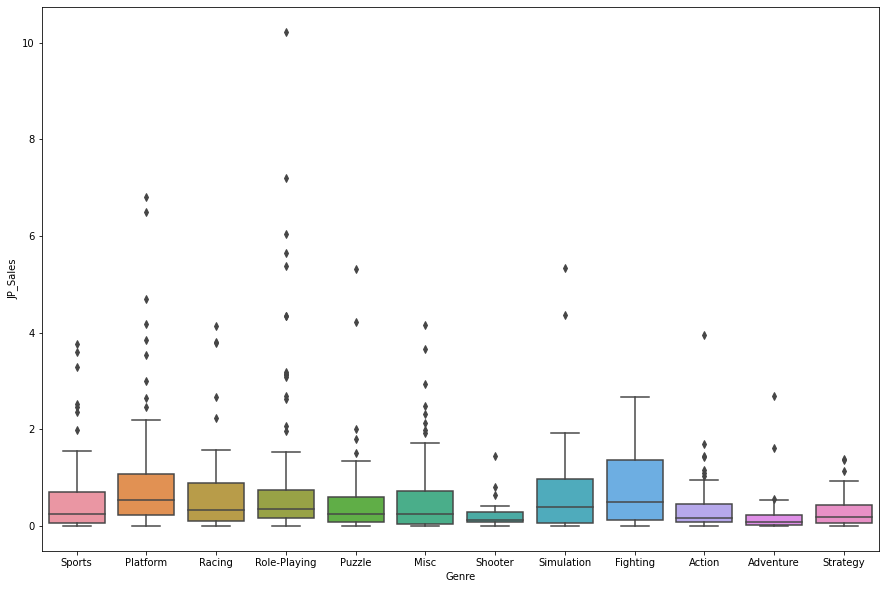

In [209]:
plt.figure(figsize=(15,10))
sns.boxplot(x=g8['Genre'], y=g8['JP_Sales'])

### Задача 9
Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков. 

In [203]:
g9=games.query(("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")and("Publisher == 'Nintendo'"))\
.groupby(['Genre','Year'], as_index = False).Global_Sales.sum()

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

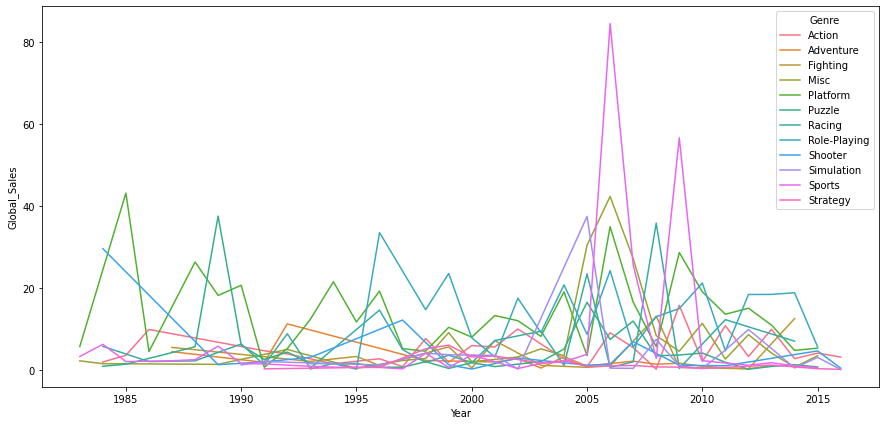

In [205]:
plt.figure(figsize=(15,7))
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data=g9)